# Uso de Pandas con SQLite

El propósito de este proyecto es mostrar como se puede trabajar en Python utilizando SQLite mediante su libreria Pandas. Para ello se utiliza la base de datos que entrega la central nacional de inteligencia (CIA) perteneciente a Los Estados Unidos, documento que acopia un gran numero de inofrmación referente a los diversos paises.
 La base de datos puede ser descargada [aqui](https://github.com/factbook/factbook.sql/releases) la referencia de las tablas en la  [pagina](https://www.cia.gov/library/publications/the-world-factbook/) oficial de la CIA. 


In [6]:
# Lectura de las Tablas existentes en la base de datos
import sqlite3 
import pandas as pd
conn = sqlite3.connect("factbook.db")

q = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q,conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


Vemos que existen dos tablas dentro de la base de datos factbook.db: sqlite_sequence y facts. Observemos que hay dentro de la tabla "facts"

In [7]:
# Observando las primeras 5 filas de la tabla "facts"
q2 = "SELECT * FROM facts LIMIT 5"
pd.read_sql_query(q2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


Una descripcion obtenida de los link anteriores se puede observar que los encabezado de esta tabla son:

* name - The name of the country.
* area - The total land and sea area of the country.
* population - The country's population.
* population_growth- The country's population growth as a percentage.
* birth_rate - The country's birth rate, or the number of births a year per 1,000 people.
* death_rate - The country's death rate, or the number of death a year per 1,000 people.
* area- The country's total area (both land and water).
* area_land - The country's land area in square kilometers.
* area_water - The country's waterarea in square kilometers.

Ahora se realizaran algunos calculos estadisticos y observer los paises outlier. 










## Summary Statistics

In [17]:
# Pais con la minima poblacion
q3 = "SELECT MIN(population),MAX(population), MIN(population_growth), MAX(population_growth) FROM facts"
pd.read_sql_query(q3, conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


## Outliers

In [22]:
# Pais con la minima poblacion
q4 = "SELECT name, MIN(population)FROM facts"
pd.read_sql_query(q4, conn)

,name,MIN(population)
0,Antarctica,0


In [23]:
q5 = "SELECT name, MAX(population) FROM facts"
pd.read_sql_query(q5, conn)

,name,MAX(population)
0,World,7256490011


Se observa que la Antartica solo tiene población flotante y no permanente y la maxima población corresponde a la población mundial total. 

## Histogramas


Ahora se realizaran histograms para el resoto de los paises ignorando los outlier encontrados anteriormente.

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1526fb2dd8>,
      dtype=object)

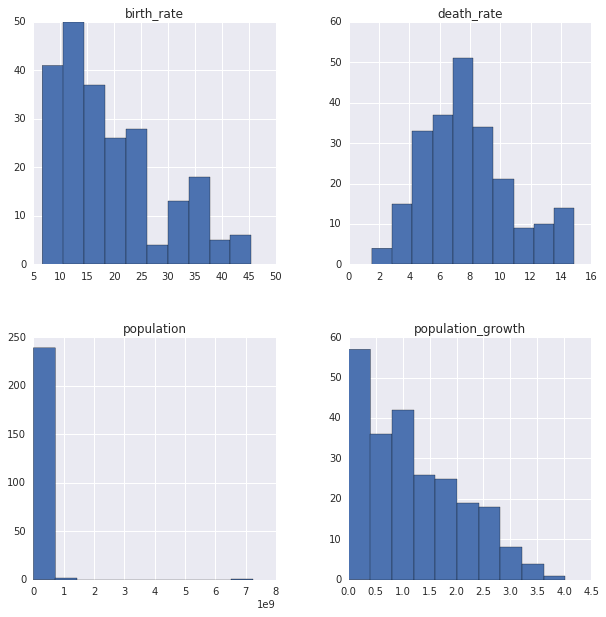

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

q6 = '''
SELECT population, population_growth, birth_rate, death_rate
FROM facts
'''
pd.read_sql_query(q6,conn).hist(ax=ax)


### ¿ Que pais tiene la densidad poblacional mas grande?

In [50]:
q7 = '''
SELECT name, CAST(population as float) / CAST(area_land as float) density
FROM facts
ORDER BY density DESC
LIMIT 10
'''
pd.read_sql_query(q7, conn)

,name,density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8259.784571
3,Hong Kong,6655.271202
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926


## Conslusion

